In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [ ]:
cwd=os.getcwd()

In [ ]:
df = pd.read_csv(cwd+'/customer_booking.csv', encoding='latin-1')

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.shape

(50000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

1.sales channel

In [ ]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [ ]:
per_internet =df['sales_channel'].value_counts().values[0]/df['sales_channel'].count()*100
per_mobile =df['sales_channel'].value_counts().values[1]/df['sales_channel'].count()*100

In [ ]:
print(f"Number of booking done through internet: {per_internet}%")
print(f"Number of booking done through mobile: {per_mobile}%")

Number of booking done through internet: 88.764%
Number of booking done through mobile: 11.236%


2.trip_type

In [ ]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
per_round=df['trip_type'].value_counts().values[0]/df['trip_type'].count()*100
per_oneway=df['trip_type'].value_counts().values[1]/df['trip_type'].count()*100
per_circletrip=df['trip_type'].value_counts().values[2]/df['trip_type'].count()*100

In [ ]:
print(f"percentage of round trip:{per_round} %")
print(f"percentage of oneway trip:{per_oneway} %")
print(f"percentage of cicle trip:{per_circletrip} %")

percentage of round trip:98.994 %
percentage of oneway trip:0.774 %
percentage of cicle trip:0.232 %


3.purchage_lead

<Axes: xlabel='purchase_lead', ylabel='Count'>

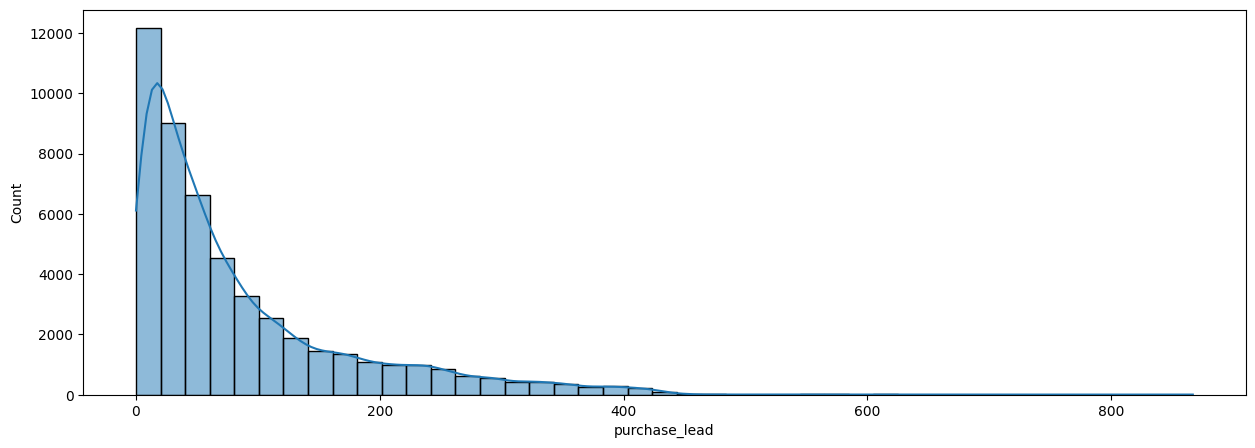

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(df.purchase_lead,binwidth=20,kde=True)

In [ ]:
df[df.purchase_lead>600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,Fri,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,Thu,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,Fri,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,Mon,KIXMLE,Japan,0,0,1,7.00,1


In [ ]:
df= df[df.purchase_lead<600]

4.length of stay

<Axes: xlabel='length_of_stay', ylabel='Count'>

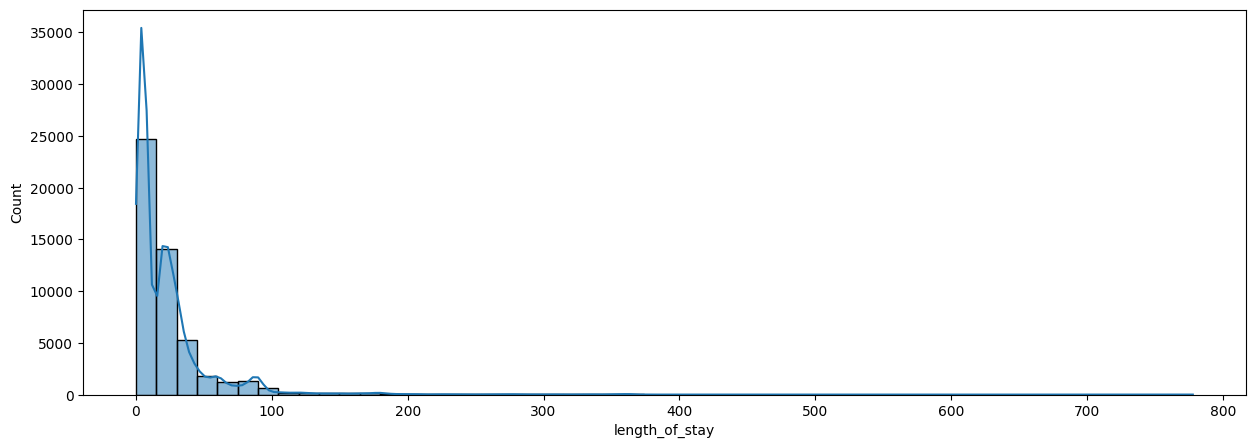

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(df.length_of_stay,binwidth=15,kde=True)

In [ ]:
df=df[df.length_of_stay<500]

In [ ]:
df.shape

(49982, 14)

6.flight_day

In [ ]:
mapping={
    'Mon':1,
    'Tue':2,
    'Wed':3,
    'Thu':4,
    'Fri':5,
    'Sat':6,
    'Sun':7
}
df.flight_day=df.flight_day.map(mapping)

<ipython-input-48-5bbafa4d25b3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.flight_day=df.flight_day.map(mapping)


In [ ]:
df.flight_day.value_counts()

,count
flight_day,
1,8099
3,7672
2,7671
4,7419
5,6759
7,6553
6,5809


7.booking_origin

In [ ]:
df.booking_origin.value_counts().head(20)

,count
booking_origin,
Australia,17863
Malaysia,7172
South Korea,4559
Japan,3884
China,3387
Indonesia,2369
Taiwan,2076
Thailand,2030
India,1267


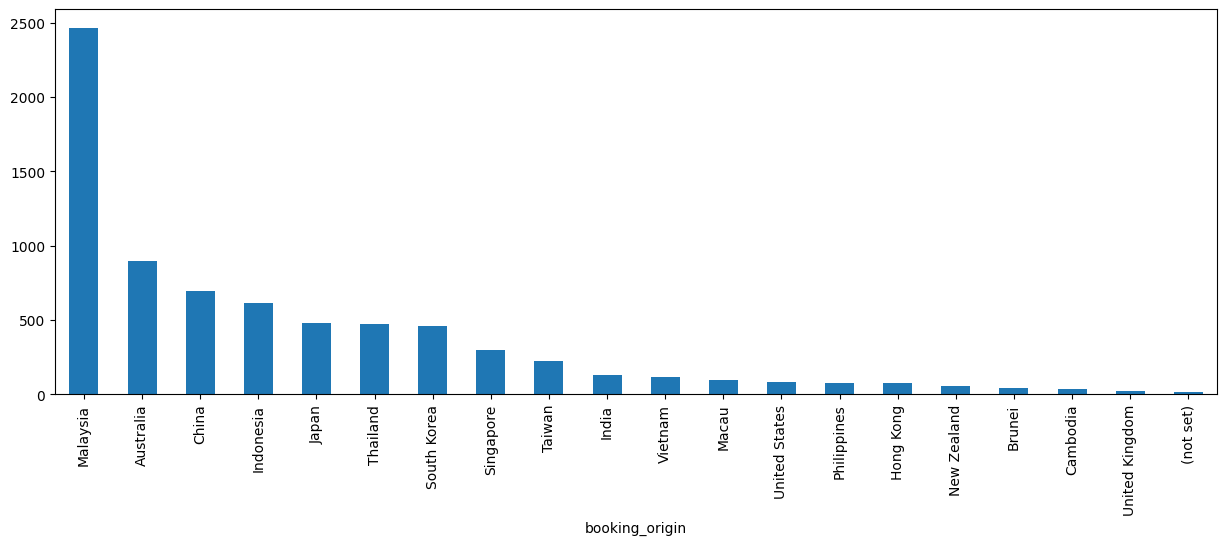

In [ ]:
plt.figure(figsize=(15,5))
ax=df[df.booking_complete==1.].booking_origin.value_counts()[:20].plot(kind="bar")

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


booking completed

In [ ]:
successfull_booking=df.booking_complete.value_counts().values[0]/len(df)*100

In [ ]:
print(f"out of 50000 booking entries only:{round(successfull_booking)}% successfull complete")

out of 50000 booking entries only:85% successfull complete


export the dataset to csv

In [ ]:
df.to_csv(cwd+'/filterd_by_jay_customer_booking.csv')